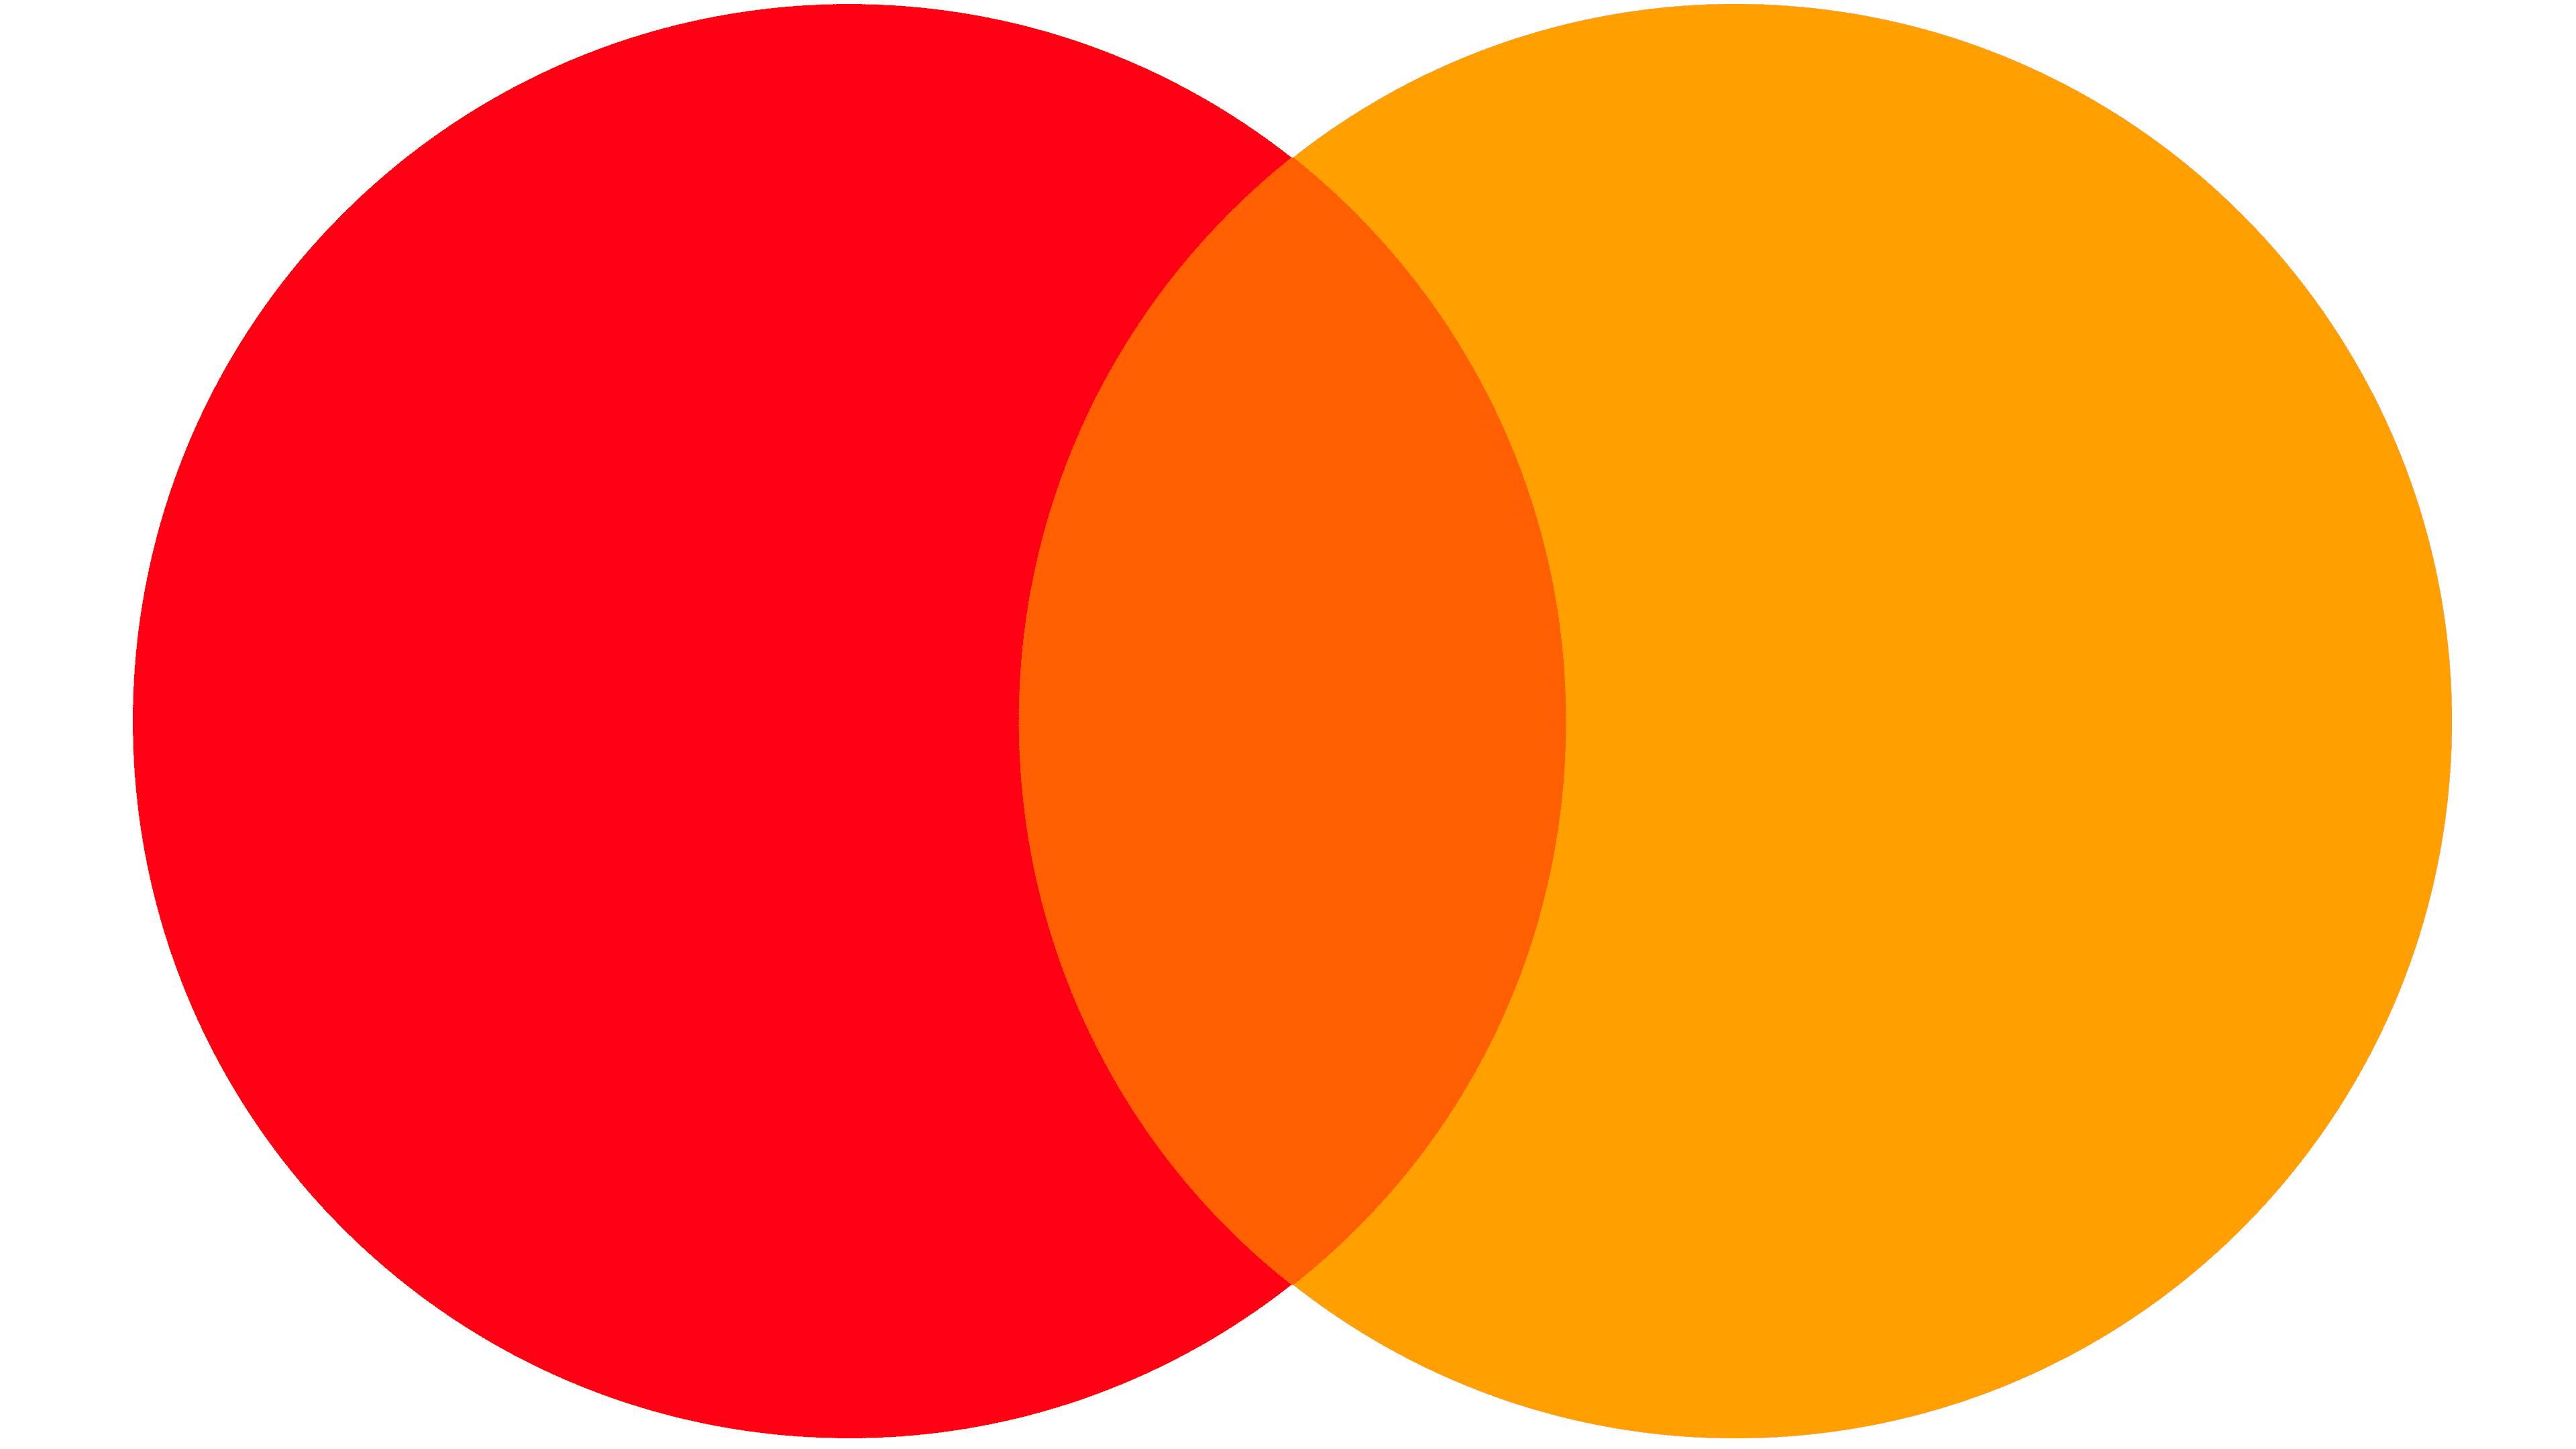

<div style="font-size: 25px; background-color: #d5e8f9; padding: 10px; border-radius: 30px; width: 70%;">
    <span style="color: #9b59b6; font-weight: 900; border: 3px solid grey;  border-radius:10px;">I</span>
    <span style="color: #e74c3c; font-weight: 900;">m</span>
    <span style="color: #1abc9c; font-weight: 900;">p</span>
    <span style="color: #8e44ad; font-weight: 900;">o</span>
    <span style="color: #f39c12; font-weight: 900;">r</span>
    <span style="color: #2ecc71; font-weight: 900;">t</span>
    <span style="color: #f1c40f; font-weight: 900;">i</span>
    <span style="color: #e67e22; font-weight: 900;">n</span>
    <span style="color: #3498db; font-weight: 900;">g</span>
    <span style="color: #e67e22; font-weight: 900;">&nbsp;</span>
    <span style="color: #e67e22; font-weight: 900;">&nbsp;</span>
    <span style="color: #f1c40f; font-weight: 900;border: 3px solid grey; border-radius:10px;">L</span>
    <span style="color: #2ecc71; font-weight: 900;">i</span>
    <span style="color: #d35400; font-weight: 900;">b</span>
    <span style="color: #9b59b6; font-weight: 900;">r</span>
    <span style="color: #e74c3c; font-weight: 900;">a</span>
    <span style="color: #1abc9c; font-weight: 900;">r</span>
    <span style="color: #8e44ad; font-weight: 900;">i</span>
    <span style="color: #f39c12; font-weight: 900;">e</span>
    <span style="color: #2ecc71; font-weight: 1500;">s</span>
</div>

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

<div style="font-size: 25px; font-family: 'Roboto', sans-serif; background-color: #d5e8f9; padding: 10px; border-radius: 30px; width: 70%; border-radius: 30px; border: 5px solid #3498db;">
    <span style="color: #e74c3c; font-weight: 900; border: 3px solid grey;  border-radius:10px">L</span>
    <span style="color: #1abc9c; font-weight: 900;">o</span>
    <span style="color: #8e44ad; font-weight: 900;">a</span>
    <span style="color: #f39c12; font-weight: 900;">d</span>
    <span style="color: #e67e22; font-weight: 900;">&nbsp;</span>
    <span style="color: #2ecc71; font-weight: 900;">t</span>
    <span style="color: #f1c40f; font-weight: 900;">h</span>
    <span style="color: #e67e22; font-weight: 900;">e</span>
    <span style="color: #e67e22; font-weight: 900;">&nbsp;</span>
    <span style="color: #f1c40f; font-weight: 900; border: 3px solid grey;  border-radius:10px;">D</span>
    <span style="color: #2ecc71; font-weight: 900;">a</span>
    <span style="color: #d35400; font-weight: 900;">t</span>
    <span style="color: #9b59b6; font-weight: 900;">a</span>
    <span style="color: #e74c3c; font-weight: 900;">s</span>
    <span style="color: #1abc9c; font-weight: 900;">e</span>
    <span style="color: #8e44ad; font-weight: 900;">t</span>
</div>

In [6]:
# Replace 'mastercard_stock_history.csv' with the path to your dataset
df = pd.read_csv('Mastercard_stock_history.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB
None
         Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   


# **Data cleaning**

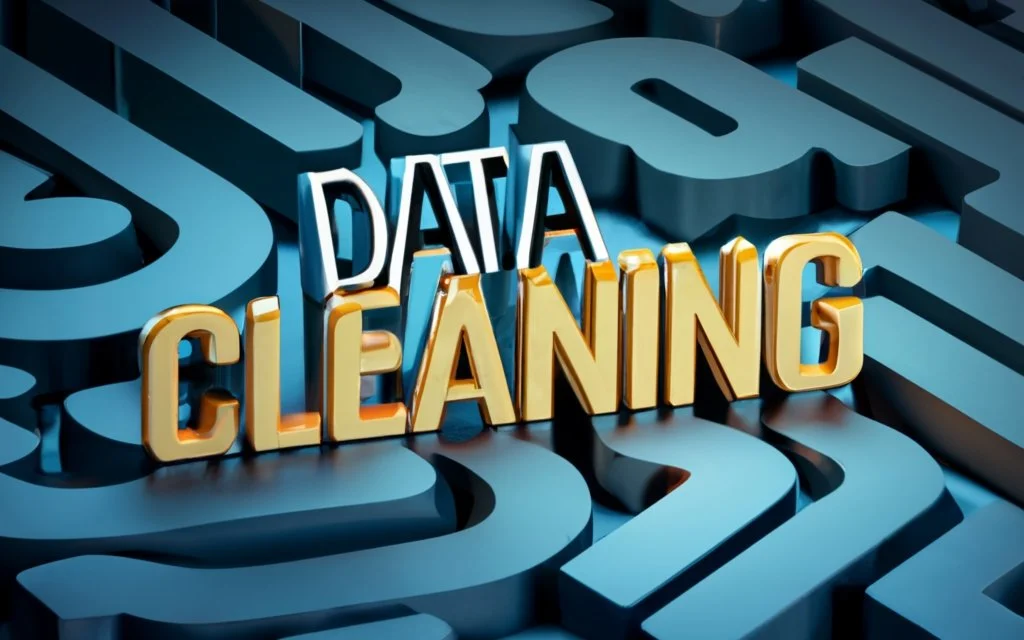

A. Checking and Handling missing values

In [7]:
# Check for missing values
print(df.isnull().sum())

# Drop rows or columns with a high number of missing values
df = df.dropna()  # Or consider filling missing values if needed


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


B. Converting date column

In [8]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows with invalid date formats
df = df.dropna(subset=['Date'])


C. Removing duplicates

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

D. Converting data types

In [14]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'open', 'high', 'low', 'close', 'volume', 'dividends', 'stocksplits' to numeric
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Dividends'] = pd.to_numeric(df['Dividends'], errors='coerce')
df['Stock Splits'] = pd.to_numeric(df['Stock Splits'], errors='coerce')

E. Handling outliers

In [16]:
# Remove outliers in 'volume' (assuming volume should be within a reasonable range)
df = df[(df['Volume'] > 0) & (df['Volume'] < df['Volume'].quantile(0.99))]

F. Saving cleaned dataset

In [18]:
# Save the cleaned dataset to a new CSV file

df_cleaned = df
df_cleaned.to_csv('cleaned_mastercard_stock_history.csv', index=False)

#  **Exploratory data analysis**

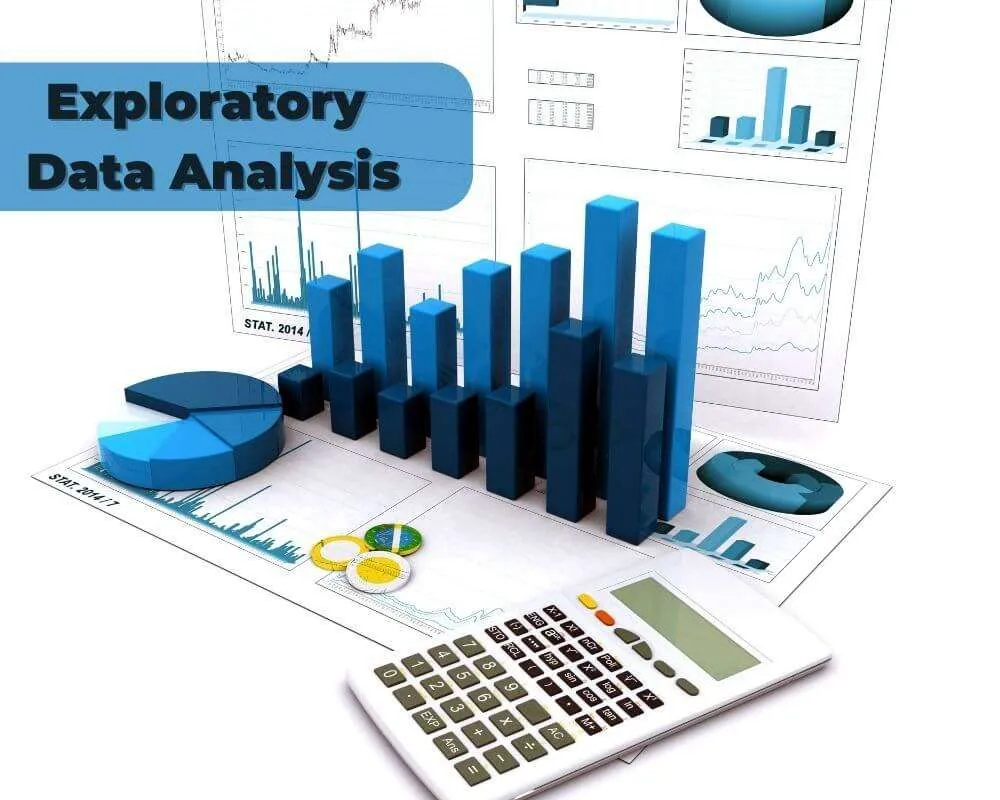

A. Summary statistics

In [19]:
# Summary statistics for numerical columns
print(df_cleaned.describe())


                                Date         Open         High          Low  \
count                           3833  3833.000000  3833.000000  3833.000000   
mean   2014-02-23 06:49:07.247587072   105.797364   106.860510   104.665761   
min              2006-05-30 00:00:00     4.084792     4.102467     3.986184   
25%              2010-05-07 00:00:00    22.571355    22.868259    22.280847   
50%              2014-03-04 00:00:00    71.359627    71.927948    70.746052   
75%              2017-12-19 00:00:00   149.090826   150.187331   148.023678   
max              2021-10-11 00:00:00   392.653890   400.521479   389.747812   
std                              NaN   106.405267   107.469093   105.203027   

             Close        Volume    Dividends  Stock Splits  
count  3833.000000  3.833000e+03  3833.000000   3833.000000  
mean    105.783379  1.123666e+07     0.002349      0.002609  
min       4.083861  6.411000e+05     0.000000      0.000000  
25%      22.608181  3.513900e+06     0.0

B. Time series of stock prices

This code analyzes the historical stock prices of Mastercard. Time series is crucial to identify patterns, making forecasts, and understanding the behevior of stock prices over time.



In [22]:
import plotly.express as px
import pandas as pd



# Ensure date column is in datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Interactive time series plot for closing price
fig = px.line(
    df_cleaned,
    x='Date',
    y='Close',
    title='Mastercard Stock Closing Price Over Time',
    labels={'Close': 'Closing Price', 'Date': 'Date'},
    line_shape='linear'  # Line type can be 'linear' or 'spline'
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Closing Price',
    template='plotly_white'  # Light theme, can also use 'plotly_dark' for dark mode
)
fig.show()




*  In September 2018, the stock exhibited an upward trend, indicating positive market sentiment or strong performance. This rise could have been driven by favorable economic indicators, company performance, or external market factors.
*  A decline in January 2019 suggests a correction or a shift in market sentiment. Possible reasons for this decrease could include negative news, earnings reports, or broader market trends impacting investor confidence.
* The increase in April 2019 indicates a recovery phase, suggesting that the initial concerns from January were addressed. This rebound may reflect improved market conditions, strong quarterly results, or investor optimism returning to the stock.
*  The uptrend in January 2020 suggests a continued positive sentiment towards the stock, potentially driven by overall market growth or specific developments within the company. This could also indicate confidence in future earnings potential.
*  A significant decline in March 2020 aligns with the onset of the COVID-19 pandemic, which triggered widespread market volatility and uncertainty. The pandemic likely influenced investor behavior, leading to panic selling and sharp market corrections.
* The recovery starting in April 2020 may suggest that the market began to adjust to the pandemic's realities. Investors may have identified opportunities in undervalued stocks, supported by government stimulus measures and economic recovery efforts.
*  The increase in July 2021 indicates a period of growth, potentially reflecting economic recovery and strong corporate performance as the effects of the pandemic began to ease. Investor sentiment may have improved significantly during this time.
*  The decrease in September 2021 could signify a period of consolidation after the previous growth or could be driven by concerns over inflation, supply chain disruptions, or other macroeconomic factors. This decline might also reflect profit-taking by investors after a sustained period of growth.


*  Overall, the time series analysis reveals a pattern of volatility driven by both internal company performance and external market factors. The stock exhibited resilience during recovery phases, particularly after significant declines linked to macroeconomic events like the pandemic. Understanding these trends can aid in forecasting future performance and making informed investment decisions.







C. Distribution of daily returns

The code analyze the distribution of daily returns for Mastercard stock. Daily returns are a critical measure in finance, indicating the percentage change in stock prices from one day to the next.


In [23]:
import pandas as pd
import plotly.express as px


# Calculate daily returns
df_cleaned['daily_return'] = df_cleaned['Close'].pct_change()

# Drop NaN values
daily_returns = df_cleaned['daily_return'].dropna()

# Create an interactive histogram using Plotly
fig = px.histogram(daily_returns,
                   x='daily_return',
                   nbins=50,
                   title='Distribution of Daily Returns',
                   labels={'daily_return': 'Daily Return'},
                   color_discrete_sequence=['purple'])

# Update layout for better visibility
fig.update_layout(xaxis_title='Daily Return',
                  yaxis_title='Frequency',
                  bargap=0.2)

# Show the interactive plot
fig.show()




*  The distribution of daily returns exhibits characteristics of a normal distribution, suggesting that the returns are symmetrically centered around the mean. This implies that there is an equal probability of experiencing gains or losses on any given day, supporting a balanced market behavior.
*  The distribution of daily returns provides valuable insights into the stock's behavior and risk profile. Understanding this distribution aids in crafting effective investment strategies, enhancing risk management practices, and informing decisions based on historical performance patterns.



D. Moving average plot

The code analyzes the moving averages of Mastercard's stock prices. Moving average are essential tools in financial analysis, helping to smooth out price data and identify trends over time. By analyzing both short-term and long-term moving averages, we can gain insigths into the stock's perfomance and potential future movements.



In [26]:
import pandas as pd
import plotly.graph_objects as go


# Calculate 20-day and 50-day moving averages
df_cleaned['MA20'] = df_cleaned['Close'].rolling(window=20).mean()
df_cleaned['MA50'] = df_cleaned['Close'].rolling(window=50).mean()

# Create an interactive plot using Plotly
fig = go.Figure()

# Add Closing Price
fig.add_trace(go.Scatter(x=df_cleaned['Date'],
                         y=df_cleaned['Close'],
                         mode='lines',
                         name='Closing Price',
                         line=dict(color='blue')))

# Add 20-Day Moving Average
fig.add_trace(go.Scatter(x=df_cleaned['Date'],
                         y=df_cleaned['MA20'],
                         mode='lines',
                         name='20-Day MA',
                         line=dict(color='orange')))

# Add 50-Day Moving Average
fig.add_trace(go.Scatter(x=df_cleaned['Date'],
                         y=df_cleaned['MA50'],
                         mode='lines',
                         name='50-Day MA',
                         line=dict(color='green')))

# Update layout
fig.update_layout(title='Mastercard Stock Closing Price and Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  legend=dict(x=0, y=1),
                  template='plotly_white')

# Show the interactive plot
fig.show()




*  The results shows a combination of the closing price, 20-day MA, and 50-day MA provides a comprehensive view of Mastercard's stock performance. The observed trends highlight the cyclical nature of the stock, where periods of growth are often followed by corrections. Continuous monitoring of these indicators can enhance investment strategies and risk management practices.



E. Trend analysis

The code involves examining the general direction in which the stock price is moving over a specific period. By plotting the stock prices and applying techniques such as moving averages, we can identify long-term trends, whether upward, downward, or sideways. This analysis helps in understanding the overall market sentiment and informs potential future price movements.

In [27]:
import plotly.express as px

# Trend Analysis
df_cleaned['Year'] = df_cleaned['Date'].dt.year
annual_trend = df_cleaned.groupby('Year')['Close'].mean().reset_index()

fig = px.line(annual_trend, x='Year', y='Close', title='Annual Average Closing Price',
              labels={'Close': 'Average Closing Price'})
fig.show()



* The line graph illustrates a consistent upward trend in the annual average closing price of Mastercard stock from 2006 to 2020. This indicates strong market performance and investor confidence over the period.
* Notably, even during economic downturns, such as the global financial crisis of 2008 and the market volatility in early 2020 due to the COVID-19 pandemic, the overall trend remained positive. This resilience suggests that Mastercard's business model and market position have allowed it to navigate challenges effectively.



F. Volatility analysis

The code assesses the degree of variation in stock prices over time. By calculating measures like the 20-day rolling volatility, we can identify periods of high market uncertainty or stability. This analysis provides insights into risk levels associated with the stock, helping investors make informed decisions based on their risk tolerance.

In [28]:
# Volatility Analysis
df_cleaned['Volatility'] = df_cleaned['Close'].rolling(window=20).std()

fig = px.line(df_cleaned, x='Date', y='Volatility', title='20-Day Rolling Volatility',
              labels={'Volatility': 'Volatility'})
fig.show()


* The 20-day rolling volatility graph illustrates a generally stable period until January 2020, followed by a significant spike correlating with the onset of the COVID-19 pandemic, indicating heightened market uncertainty; this volatility decreased until April 2020 but spiked again from September to November 2020 and in March 2021, reflecting ongoing fluctuations in investor sentiment and market reactions to evolving economic conditions.





G. Seasonal decomposition

The code analyzes how stock prices behave over time by breaking them down into trend, seasonal, and residual components. This method helps in identifying recurring patterns that occur at specific intervals (e.g., quarterly or annually)

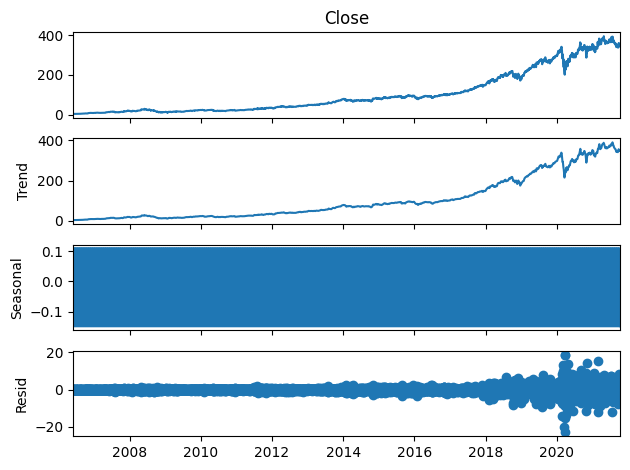

In [33]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for date manipulation


# Seasonal Decomposition

# Check if 'Date' is already an index
if 'Date' in df_cleaned.index.names:
    # If 'Date' is an index, reset it to a column
    df_cleaned = df_cleaned.reset_index()

# If the 'Date' column is not already datetime, convert it
if not pd.api.types.is_datetime64_any_dtype(df_cleaned['Date']):
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Reset index before setting 'Date' as index, this will preserve the 'Date' column
df_cleaned = df_cleaned.reset_index()

# Now set 'Date' as index
df_cleaned = df_cleaned.set_index('Date')

# Infer the frequency if possible, or specify it directly
df_cleaned = df_cleaned.asfreq(pd.infer_freq(df_cleaned.index))
# if infer_freq fails, manually define frequency eg: df_cleaned = df_cleaned.asfreq('D') for daily

# --- Handle Missing Values ---
# Option 1: Remove rows with missing values
# df_cleaned = df_cleaned.dropna(subset=['Close'])

# Option 2: Fill missing values using interpolation
df_cleaned['Close'] = df_cleaned['Close'].interpolate()

# --- End of Handling Missing Values ---


decomposition = seasonal_decompose(df_cleaned['Close'], model='additive')
fig = decomposition.plot()
plt.show()



*   There is no strong seasonal pattern in the monthly plots however we can see peaks in the beginning of the year for the last 4 years and a pick between the months of july to september




H. Cumulative results

The code track the total returns of the stock over a specified period, showing how much an investment would have grown (or shrunk) when compounded. This analysis provides a clear picture of overall performance and aids in comparing the stock’s growth against benchmarks or other investments.

In [35]:
# Cumulative Returns
df_cleaned['Cumulative Return'] = (1 + df_cleaned['daily_return']).cumprod()

# Reset the index to bring 'Date' back as a column
df_cleaned = df_cleaned.reset_index()

fig = px.line(df_cleaned, x='Date', y='Cumulative Return', title='Cumulative Returns of Mastercard Stock',
              labels={'Cumulative Return': 'Cumulative Return'})
fig.show()


* The cumulative returns of Mastercard stock show a consistent upward trend overall, interrupted by a notable decrease from November 2020 to January 2021 and another decline from February 2020 to April 2020, suggesting that while the stock generally performs well, it experienced significant volatility during these periods, likely influenced by external market factors and economic conditions




I. Event study analysis

The code evaluates the impact of specific events on stock price movements. By examining stock performance before, during, and after an event (such as earnings announcements or major market changes), we can assess how these events affect investor sentiment and stock valuations.

In [38]:
import plotly.express as px
import pandas as pd


# Event Study Analysis
event_date = '2021-01-01'
event_window = df_cleaned[(df_cleaned['Date'] >= '2020-12-01') & (df_cleaned['Date'] <= '2021-01-31')]

fig = px.line(event_window, x='Date', y='Close', title='Stock Price around Event Date')


# get the timestamp in milliseconds as a workaround
event_date_converted = pd.to_datetime(event_date).timestamp() * 1000

fig.add_vline(
    x=event_date_converted,
    line_dash="dash",
    line_color="red",
    annotation_text="Event Date",
    annotation_position="top right"
)
fig.show()

* The stock price exhibited declines on several days in December 2020 and January 2021, indicating market volatility and potential investor reactions to specific events or announcements during this period, which may have impacted overall sentiment and trading behavior.
*  On the day of the event, the stock price reached a peak, suggesting a positive initial reaction from investors; however, it subsequently declined, indicating a possible correction as the market adjusted to the event's implications and investor sentiment shifted.



J. Correlation analysis

The code identify strong correlations, both positive and negative, among variables such as stock price, dividends, volume, and moving averages. This analysis aids in understanding the dynamics of stock behavior and informs investment strategies based on these relationships.

In [39]:
# Heatmap of Correlations
correlation_matrix = df_cleaned.corr()

fig = px.imshow(correlation_matrix, text_auto=True, title='Correlation Heatmap')
fig.show()




* The correlation matrix reveals that all features in yellow—such as date, level_0, index, open, high, low, close, 20-day moving average (MA), 50-day moving average (MA), year, volatility, and cumulative return—exhibit a perfect correlation of 1, indicating they move in tandem with one another. Conversely, the analysis shows notable negative correlations with dividends (-0.085), stock splits (-322.89), daily return (-0.02424), and volume (-0.6697). These negative correlations suggest that as dividends and stock splits occur, or as trading volume increases, the daily returns may decline, reflecting market dynamics where higher volatility or changes in capital structure can impact stock performance and investor returns.




#### Summary



* The exploratory data analysis (EDA) conducted on the Mastercard stock dataset reveals several key insights. The trend analysis indicates a generally upward trajectory in stock prices, with periods of volatility reflecting market reactions to external events. Volatility analysis shows significant spikes during critical periods, suggesting heightened investor uncertainty, particularly around the onset of the COVID-19 pandemic. Seasonal decomposition uncovers recurring patterns that can inform future price forecasts.
*  Cumulative results illustrate the overall growth of the stock, while event study analysis highlights how specific events impact investor sentiment and stock valuations, often leading to immediate price reactions followed by adjustments. Finally, the correlation analysis demonstrates strong interrelationships among key features, providing valuable insights into how dividends, stock splits, and trading volume influence stock performance. Overall, these analyses offer a comprehensive understanding of the stock’s behavior, guiding informed investment decisions.

